# Support Vector Machines (SVM) using Scikit-Learn

**Author**:Sarvin


In [1]:
#Importing a few essential libraries and then loading one of the data sets.

In [2]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
PLOT = True
DO_DNN = True
DO_SVM = True 
VERBOSE = False
DO_Lin = True
DO_Nu  = True 

In [5]:

# Load a ROOT file
filePath='../files/JetNtuple_RunIISummer16_13TeV_MC_1_skimmed.root'
tree = uproot.open(filePath)['jetTree']


In [6]:
# Create and fill a dataframe
df = pd.DataFrame()
remaining_vars = []

In [7]:
for key in tree.keys():
   
   #TO-DO: Figure out how to accomodate awkward arrays
   if str(type(tree[key].array()[0])) != "<class 'awkward.highlevel.Array'>":
      df[key] = np.array(tree[key].array())
   else:
      remaining_vars.append(key)
   pass

if VERBOSE:   
   print("Remaining variables not accounted for:")
   print(remaining_vars)

# First remove all the other types of jets from the data except the gluon and the light quark (UDS) jets
df = df[(df.isPhysG==1) | (df.isPhysUDS==1)].reset_index()

if VERBOSE:   
   print(df)

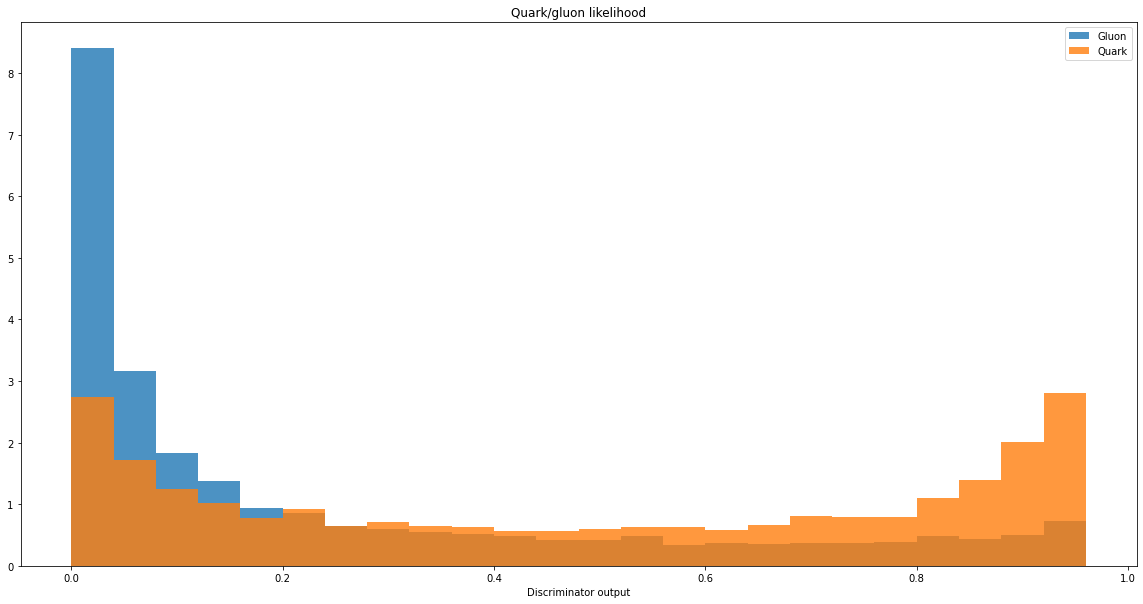

In [9]:
if PLOT:
   
   hist_columns = ['QG_mult','QG_ptD','QG_axis2']
   binnings = [np.arange(0,70,2), np.arange(0.0,1.0,0.04), np.arange(0.0,0.2,0.01)]

   ind = 0
   fig, axes = plt.subplots(1, 3, figsize=(20,10))

   for column in hist_columns:
      axes[ind].hist( df[df.isPhysG==1][column], bins=binnings[ind], alpha=0.8, label='Gluon', density=1 )
      axes[ind].hist( df[df.isPhysUDS==1][column], bins=binnings[ind], alpha=0.8, label='Quark', density=1 )
      axes[ind].set_xlabel(column)
      axes[ind].legend()
      ind = ind+1

   plt.savefig("./ML_vars.png")
   plt.clf()

   binning = np.arange(0.0, 1.0, 0.04)
   plt.hist( df[df.isPhysG==1]['jetQGl'], bins=binning, alpha=0.8, label='Gluon', density=1 )
   plt.hist( df[df.isPhysUDS==1]['jetQGl'], bins=binning, alpha=0.8, label='Quark', density=1 )
   plt.legend()
   plt.xlabel('Discriminator output')
   plt.title('Quark/gluon likelihood')

   plt.savefig("./ML_QGL.png")
